### Bias-variance trade-off

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [5]:
import numpy as np

In [10]:
def make_data(N, err=1.0, rseed = 0):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)** 2
    y = 10 -1./ (X.ravel() +0.1)
    if err > 0:
        y += err * rng.rand(N)
    return X, y

In [24]:
X, y = make_data(40)

In [12]:
X

array([[3.01196262e-01],
       [5.11495830e-01],
       [3.63323688e-01],
       [2.96897683e-01],
       [1.79483389e-01],
       [4.17179205e-01],
       [1.91482567e-01],
       [7.95259085e-01],
       [9.28645916e-01],
       [1.47027398e-01],
       [6.26828536e-01],
       [2.79729836e-01],
       [3.22674623e-01],
       [8.56729137e-01],
       [5.04612156e-03],
       [7.59151487e-03],
       [4.08783595e-04],
       [6.93255807e-01],
       [6.05527929e-01],
       [7.56921138e-01],
       [9.57693860e-01],
       [6.38654411e-01],
       [2.12963202e-01],
       [6.09225795e-01],
       [1.39888398e-02],
       [4.09498914e-01],
       [2.05501650e-02],
       [8.92399363e-01],
       [2.72325671e-01],
       [1.71944524e-01],
       [6.99896719e-02],
       [5.99437806e-01],
       [2.08073126e-01],
       [3.23117154e-01],
       [3.53056600e-04],
       [3.81473607e-01],
       [3.74661174e-01],
       [3.80607556e-01],
       [8.90660436e-01],
       [4.64878920e-01],


In [13]:
y

array([ 8.07765112,  8.80326738,  8.83005552,  7.58250377,  6.63084658,
        8.22774376,  7.22237143,  9.13629651,  9.49415895,  6.19629163,
        8.78312927,  7.47692392,  8.29044353,  9.09295504,  0.67695436,
        1.07431193,  0.86170517,  8.83647388,  9.42056657,  8.92912988,
       10.03100631,  9.11483813,  7.78149725,  9.19485732,  1.96647493,
        8.07647507,  1.98750517,  9.11253771,  7.61031948,  6.44150715,
        4.43527284,  8.98454331,  6.81816491,  8.3290605 ,  0.6017829 ,
        8.18843245,  8.4164821 ,  8.01324081,  9.56651888,  9.15900532,
        5.95644136,  7.23094799,  8.42731812,  1.06634252,  8.45312135,
        8.36419977,  3.65462397,  1.44539537,  5.81628419,  5.69964892])

In [14]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [17]:
import seaborn; seaborn.set();

In [18]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

In [19]:
X_test

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

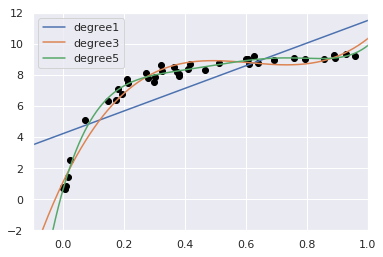

In [30]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree{0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [31]:
from sklearn.learning_curve import validation_curve

In [32]:
degree = np.arange(0, 21)

In [33]:
degree

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [41]:
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

Text(0,0.5,'score')

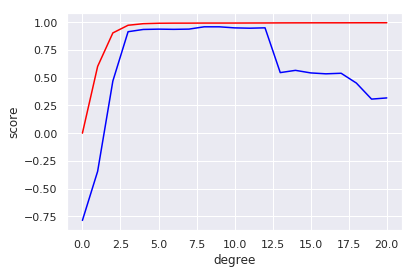

In [47]:
plt.plot(degree, np.median(train_score, 1), color='red', label='trinig_score')
plt.plot(degree, np.median(val_score, 1), color='blue', label='validation_score')
plt.xlabel('degree')
plt.ylabel('score')

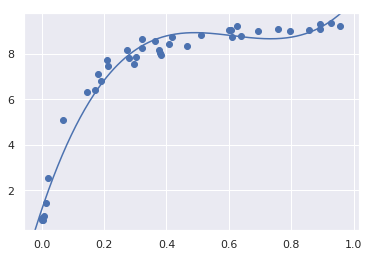

In [50]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

### Validation curve

In [51]:
X2, y2 = make_data(200)

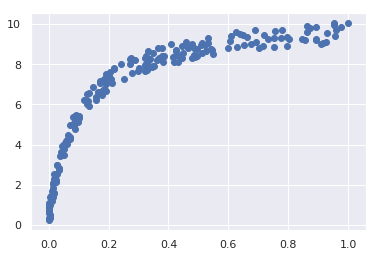

In [52]:
plt.scatter(X2.ravel(), y2)

In [56]:
train_score2,val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

Text(0,0.5,'score')

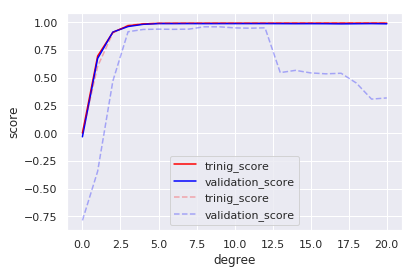

In [62]:
plt.plot(degree, np.median(train_score2, 1), color='red', label='trinig_score')
plt.plot(degree, np.median(val_score2, 1), color='blue', label='validation_score')
plt.plot(degree, np.median(train_score, 1), color='red', label='trinig_score', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='blue', label='validation_score', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.xlabel('degree')
plt.ylabel('score')

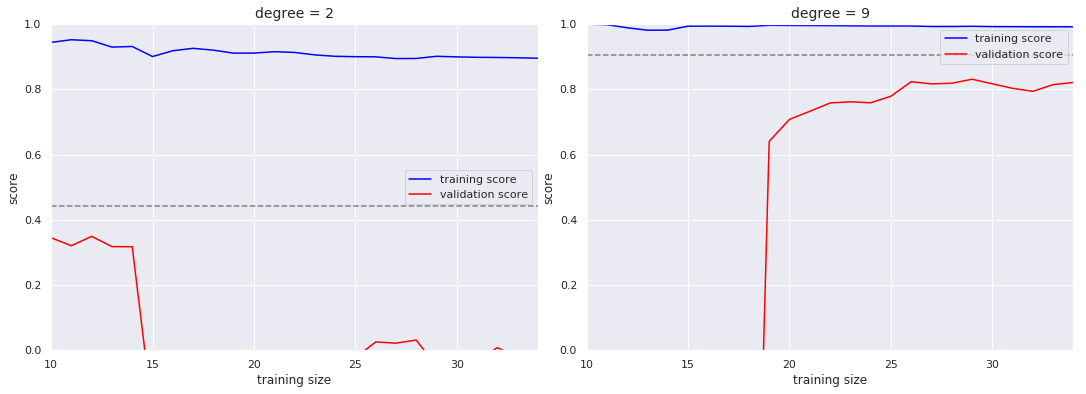

In [72]:
from sklearn.learning_curve import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [68]:
learning_curve?

### Grid search

In [73]:
from sklearn.grid_search import GridSearchCV

In [91]:
param_grid={'polynomialfeatures__degree': np.arange(5),
          'linearregression__fit_intercept': [True, False],
          'linearregression__normalize': [True, False]}

In [92]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [85]:
grid

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [93]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([  0,   1, ..., 211, 212]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [87]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 6}

In [88]:
model = grid.best_estimator_

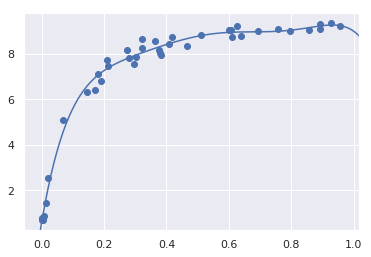

In [90]:
plt.scatter(X.ravel(), y)
lim=plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

### Categorical features

In [94]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Downtown'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Lychakiv'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Stryiskyi Park'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Sykhiv'}
]

In [95]:
from sklearn.feature_extraction import DictVectorizer

In [96]:
vec = DictVectorizer(sparse=False, dtype=int)

In [98]:
vec.fit_transform(data)

array([[     1,      0,      0,      0, 850000,      4],
       [     0,      1,      0,      0, 700000,      3],
       [     0,      0,      1,      0, 650000,      3],
       [     0,      0,      0,      1, 600000,      2]], dtype=int64)

In [99]:
vec.get_feature_names()

['neighborhood=Downtown',
 'neighborhood=Lychakiv',
 'neighborhood=Stryiskyi Park',
 'neighborhood=Sykhiv',
 'price',
 'rooms']

### Text features

In [100]:
sample=['problem of gambit',
       'Queen''s gambit',
       'another problem']

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vec = CountVectorizer()

In [104]:
X = vec.fit_transform(sample)

In [105]:
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [107]:
import pandas as pd

In [108]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,another,gambit,of,problem,queens
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,0,1,0


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
vec = TfidfVectorizer()


In [111]:
X = vec.fit_transform(sample)

In [112]:
X

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [113]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,another,gambit,of,problem,queens
0,0.000000,0.517856,0.680919,0.517856,0.000000
1,0.000000,0.605349,0.000000,0.000000,0.795961
2,0.795961,0.000000,0.000000,0.605349,0.000000


### Derived features

In [4]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

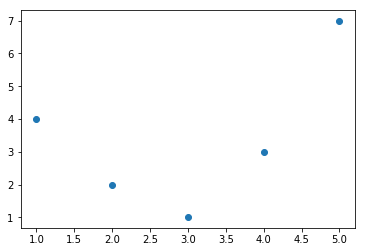

In [10]:
plt.scatter(x, y)

In [119]:
X=x[:, np.newaxis]

In [120]:
model = LinearRegression().fit(X, y)

In [121]:
yfit = model.predict(X)

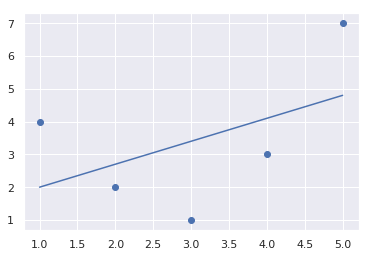

In [123]:
plt.scatter(x, y)
plt.plot(x, yfit)

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [126]:
X2 = poly.fit_transform(X)

In [128]:
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [129]:
model = LinearRegression().fit(X2, y)

In [147]:
from sklearn.cluster import KMeans

In [130]:
yfit = model.predict(X2)

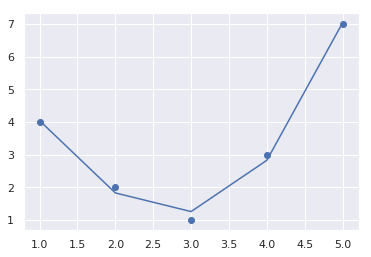

In [131]:
plt.scatter(x, y)
plt.plot(x, yfit)

In [133]:
from numpy import nan

In [134]:
X = np.array([[nan, 0, 3],
             [3, 7, 9],
             [3, 5, 2],
             [4, nan, 6],
             [8, 8, 1]])

In [135]:
y = np.array([14, 16, -1, 8, -5])

### Data cleaning and pipelines

In [137]:
from sklearn.preprocessing import Imputer

In [138]:
imp = Imputer(strategy='mean')

In [139]:
X2 = imp.fit_transform(X)

In [142]:
X3 = imp.fit(X)

In [145]:
X3.transform(X)

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [140]:
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [150]:
model = make_pipeline(Imputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [152]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [153]:
model.predict(X)

array([14., 16., -1.,  8., -5.])